`예제 4-1` 상하좌우   
현 위치가 (x, y)일 때   
L -> (x, y - 1)   
R -> (x, y + 1)   
U -> (x - 1, y)   
D -> (x + 1, y)   

In [10]:
n = int(input())
plan = input().split()

x, y = 1, 1
for c in plan:
    if c == 'L' and y > 1:
        y -= 1
    elif c == 'R' and y < n:
        y += 1
    elif c == 'U' and x > 1:
        x -= 1
    elif c == 'D' and x < n:
        x += 1
(x, y)

 2
 R R R R U U U D


(2, 2)

`예제 4-2` 시각

In [14]:
n = int(input())

hour, minute, second = 0, 0, 0
count = 0
while hour <= n:
    if '3' in str(hour) or '3' in str(minute) or '3' in str(second):
        count += 1
        
    second += 1
    if second > 59:
        second = 0
        minute += 1
    if minute > 59:
        minute = 0
        hour += 1
count

 5


11475

`실전문제 2` 왕실의 나이트

In [31]:
from itertools import product

x, y = input()

x = 'abcdefgh'.index(x)
y = '12345678'.index(y)

boundary = range(0,8)
moves = list(product([1,-1], [2,-2])) + list(product([2,-2], [1,-1]))

count = 0
for move in moves:
    if x + move[0] in boundary and y + move[1] in boundary: # in 키워드는 O(n)
        count += 1
count

 a1


2

`실전문제 3` 게임 개발     
    
- map_state = [[1,1,1,1], [1,0,0,1]] 이중 리스트   
- 방문한 육지는 2로 변경
- map_state[y][x]로 접근 가능

In [6]:
def print_state(y, x, d, map_state):
    di = ['↑', '→', '↓', '←']
    for i, li in enumerate(map_state):
        for j, c in enumerate(li):
            if y == i and x == j:
                print(str(c)+di[d], end=' ')
            else:
                print(c, end=' ')
        print()
    print()

In [7]:
map_state = [[1, 1, 1, 1], [1, 0, 0, 1], [1, 1, 0, 1], [1, 1, 1, 1]]
y, x, d = 1, 1, 0

print_state(y, x, d, map_state)

1 1 1 1 
1 0↑ 0 1 
1 1 0 1 
1 1 1 1 



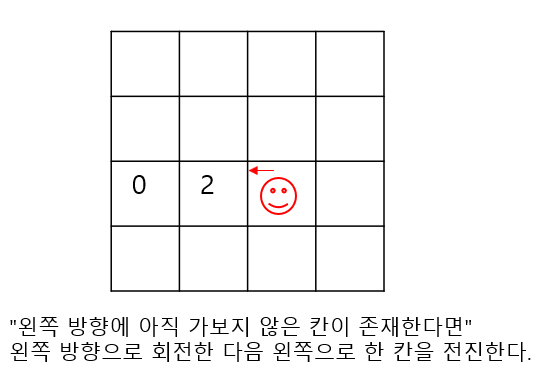   
전진해야 되는거 아니냐고 ;;

#### 그런 줄 알고 짠 첫 번째 코드

In [15]:
def play_game(n, m, y, x, d, map_state):
    
    map_state[y][x] = 2

    while True:
        print_state(y, x, d, map_state)

        moved = False
        for i in range(4):
            d = (d - 1) % 4
            print('turning left...')
            if d == 0:
                if sum([map_state[_y][x] == 0 for _y in range(y - 1, -1, -1)]) > 0\
                    and map_state[y - 1][x] != 1:
                    y -= 1
                    map_state[y][x] = 2
                    moved = True
                    print('moving north...')
                    break
            elif d == 1:
                if sum([map_state[y][_x] == 0 for _x in range(x + 1, m)]) > 0\
                    and map_state[y][x + 1] != 1:
                    x += 1
                    map_state[y][x] = 2
                    moved = True
                    print('moving east...')
                    break
            elif d == 2:
                if sum([map_state[_y][x] == 0 for _y in range(y + 1, n)]) > 0\
                    and map_state[y + 1][x] != 1:
                    y += 1
                    map_state[y][x] = 2
                    moved = True
                    print('moving south...')
                    break
            else:
                if sum([map_state[y][_x] == 0 for _x in range(x - 1, -1, -1)]) > 0\
                    and map_state[y][x - 1] != 1:
                    x -= 1
                    map_state[y][x] = 2
                    moved = True
                    print('moving west...')
                    break


        if not moved:
            print('moving backward...')
            if d == 0 and y < n - 1 and map_state[y + 1][x] != 1:
                y += 1
            elif d == 1 and x > 0 and map_state[y][x - 1] != 1:
                x -= 1
            elif d == 2 and y > 0 and map_state[y - 1][x] != 1:
                y -= 1
            elif d == 3 and x < m - 1 and map_state[y][x + 1] != 1:
                x += 1
            else:
                print('game over...')
                break
                
    print(f'Number of visited cells : {sum([sum([i == 2 for i in li]) for li in map_state])}')

In [16]:
n, m = [int(i) for i in input().split()]
y, x, d = [int(i) for i in input().split()]

map_state = []
for _ in range(n):
    map_state.append([int(i) for i in input().split()])
    
play_game(n, m, y, x, d, map_state)

 4 4
 1 1 0
 1 1 1 1
 1 0 0 1
 1 1 0 1
 1 1 1 1


1 1 1 1 
1 2↑ 0 1 
1 1 0 1 
1 1 1 1 

turning left...
turning left...
turning left...
moving east...
1 1 1 1 
1 2 2→ 1 
1 1 0 1 
1 1 1 1 

turning left...
turning left...
turning left...
moving south...
1 1 1 1 
1 2 2 1 
1 1 2↓ 1 
1 1 1 1 

turning left...
turning left...
turning left...
turning left...
moving backward...
1 1 1 1 
1 2 2↓ 1 
1 1 2 1 
1 1 1 1 

turning left...
turning left...
turning left...
turning left...
moving backward...
game over...
Number of visited cells : 3
